### abalone.csv의 Rings 레이블 Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv("C:/AI_Dataset/abalone.csv")
df.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
29      1
26      1
2       1
25      1
Name: count, dtype: int64

In [4]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [5]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df = df.drop('id', axis = 1)

In [7]:
target = 'Rings'
X = df.drop(columns=[target], axis = 1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 8), (836, 8), (3341,), (836,))

In [10]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(8,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

C:\Users\gustj\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,041 (4.07 KB)

 Trainable params: 1,041 (4.07 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split = 0.1) # validation_data = (X_test, y_test) -> validation_split = 0.1
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 105.1296 - mse: 105.1296 - val_loss: 49.3803 - val_mse: 49.3803
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.5801 - mse: 36.5801 - val_loss: 17.8826 - val_mse: 17.8826
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.8995 - mse: 15.8995 - val_loss: 7.8289 - val_mse: 7.8289
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.1570 - mse: 11.1570 - val_loss: 5.1679 - val_mse: 5.1679
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0440 - mse: 7.0440 - val_loss: 4.7711 - val_mse: 4.7711
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.6409 - mse: 6.6409 - val_loss: 4.6330 - val_mse: 4.6330
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8313 - mse: 5.8313 - val_loss: 4.5406 - val_mse: 4.5406
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.5872 - mse: 5.5872 - val_loss: 4.5033 - val_mse: 4.5033
Epoch 9/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss:

ValueError: `axis` must be fewer than the number of dimensions (1)

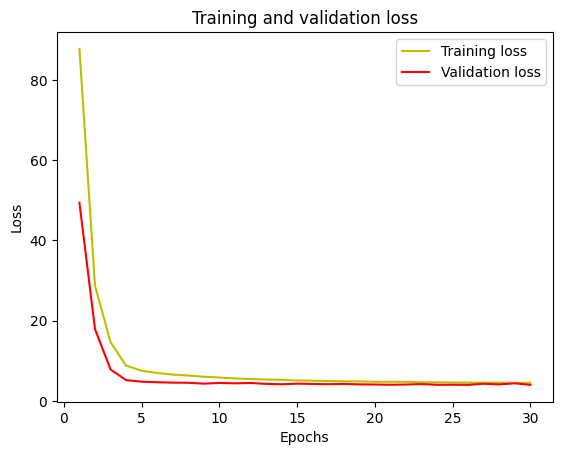

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8065 - mse: 4.8065 


[4.639456272125244, 4.639456272125244]